In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import math
%matplotlib inline

In [70]:
# Reading dataset in python dataframe
df = pd.read_csv('Python-books/listings.csv')

In [71]:
# See dataframe details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [72]:
# See top 5 rows from dataset
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [73]:
#shape of dataframe- nuber of rows and number of clumns
df.shape

(3818, 92)

In [74]:
#check null values
pd.set_option('display.max_rows', 92)
df.isnull().sum().sort_values(ascending=False)

license                             3818
square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
notes                               1606
neighborhood_overview               1032
cleaning_fee                        1030
transit                              934
host_about                           859
host_acceptance_rate                 773
review_scores_accuracy               658
review_scores_checkin                658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
reviews_per_month                    627
first_review                         627
last_review                          627
space                                569
host_response_time                   523
host_response_rate                   523
neighbourhood   

I am going to work on Price, Amentites,neighbourhood_group_cleansed,room_type and property_type which has zero missing vales so as of now I am not bothered about handling the missing values.

In [75]:
#Review neighbourhood
df.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False).head(10)

,id
neighbourhood_cleansed,
Broadway,397
Belltown,234
Wallingford,167
Fremont,158
Minor,135
University District,122
Stevens,119
First Hill,108
Central Business District,103


The neighbourhood that has the highest number of listings is Broadway, and almost 2 times more than the second most neighbourhood (Beltown). .

# Question-1
When I look into the dataset, I see amenities column which gives detailed information about features of the listing. I would like to know what are the most common amenities that are available in Seattle Airbnb dataset. 
So the question is: What are the most common amenities oofered by diiferent stays at airnbnb at Seattle?


In [76]:
#look at amenities column
df['amenities'].unique()

array(['{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}',
       '{TV,Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials}',
       '{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed","Pets live on this property",Dog(s),Cat(s),"Hot Tub","Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo}',
       ...,
       '{"Cable TV","Wireless Internet",Kitchen,"Free Parking on Premises",Breakfast,"Pets live on this property",Dog(s),Cat(s),Heating,Washer,Dryer,"Smoke Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials,Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}',
       '{TV,"Wireless I

In [77]:
#first clean the amenities column
df.amenities = df.amenities.str.replace("[{}]", "").str.replace('"', "")

In [78]:
#check the cleaning done 
df.amenities[0]

'TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,Dryer'

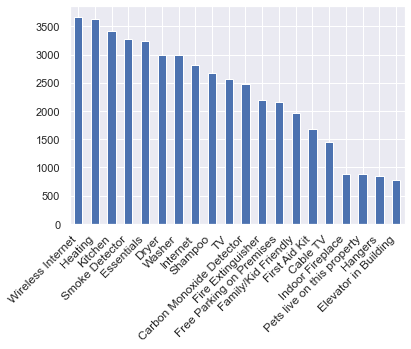

In [79]:
#Top 20 most common amentities

pd.Series(np.concatenate(df['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

In the above graph you can see that the most common amenities in Seattle listings are:

- Wireless Internet
- Heating
- Kitchen
- Smoke Detector
- Essentials

Whereas the least common amenities in Seattle listings are:

- Elevators
- Hangers
- pets
- Indoor Fireplace
- Cable tv

## Question-2

Is there a relationship between amenities offered and price of homestay?

Amenities vs. price top 20

In [80]:
#Remove $ from price columns

df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].astype(float)

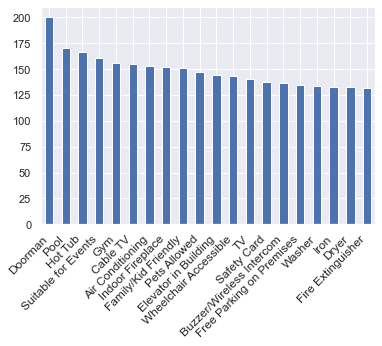

In [81]:
amenities = np.unique(np.concatenate(df['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, df[df['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])

amenity_srs.sort_values(ascending=False)[:20].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();


Here we can see interesting pattern that amenities are related to homestay price.
If doorman and pool are available then prices are on higher side.

## Question no-3
Price of Homestay at different neighbourhood
Does neighbourhood has impact on hometsay price?



In [82]:
#Exploring the price

df['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [83]:
#The most expensive Airbnb listing in Toronto is at $1000/night.
df.iloc[np.argmax(df['price'])]

id                                                                            4825073
listing_url                                      https://www.airbnb.com/rooms/4825073
scrape_id                                                              20160104002432
last_scraped                                                               2016-01-04
name                                                          Cute Basement Apartment
summary                             2 bedroom fully finished basement apartment wi...
space                                                                             NaN
description                         2 bedroom fully finished basement apartment wi...
experiences_offered                                                              none
neighborhood_overview                                                             NaN
notes                                                                             NaN
transit                                               

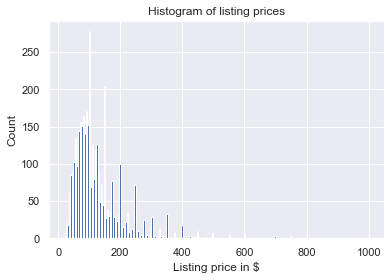

In [84]:
#Price distribution of homestays
df.price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');

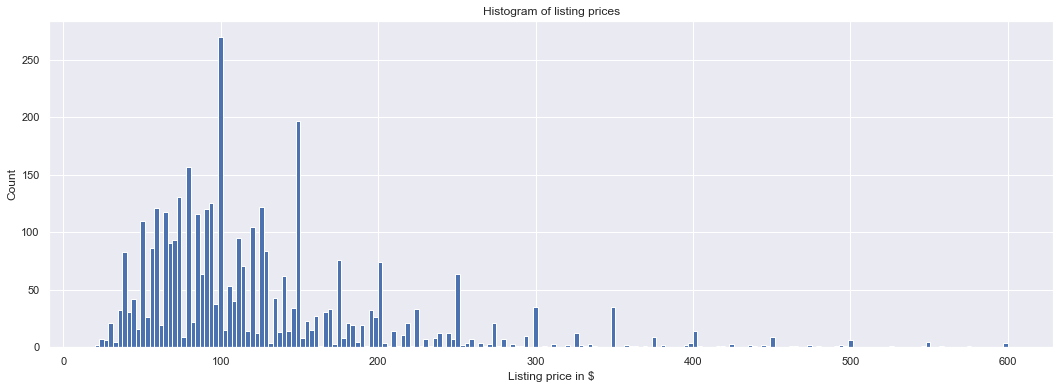

In [85]:
#let's remove all prices above 600 whoch seems to be outliers
plt.figure(figsize=(18,6))
df.loc[df.price <= 600].price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');


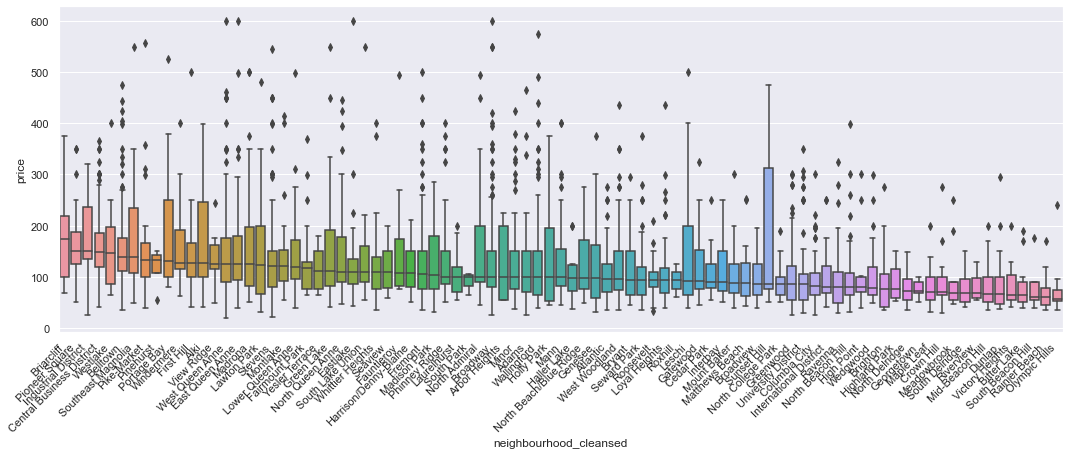

In [86]:
# Neighborhood vs prices

plt.figure(figsize=(18,6))
sort_price = df.loc[df.price <= 600]\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=df.loc[(df.price <= 600) & (df.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

Briajrcliff and pioneer square has highest median price while Oylmic hills has lowest median price.

## Question -4

Does property has impact on prices of homestay?

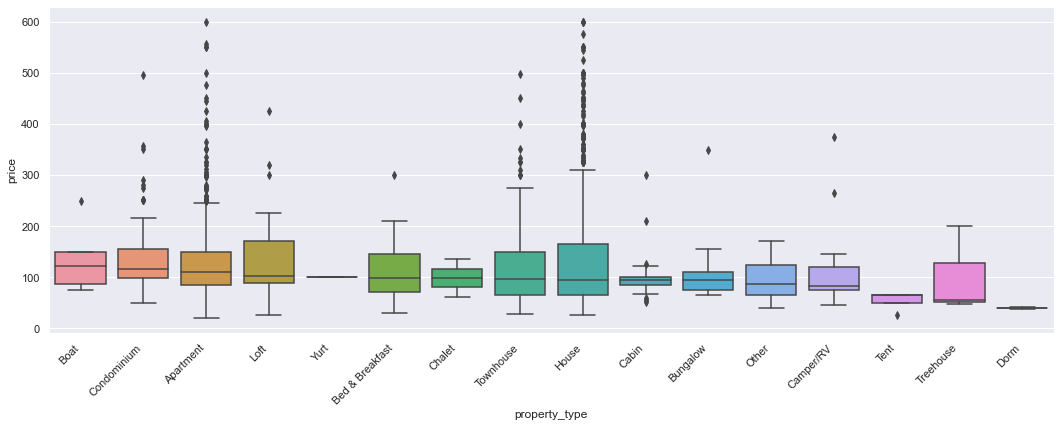

In [87]:
#property type vs. price
sort_price = df.loc[(df.price <= 600) & (df.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(18,6))
sns.boxplot(y='price', x='property_type', data=df.loc[(df.price <= 600) & (df.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

In [88]:
df.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

When we look at the median price for each property type, we we can say that most expensive property type is Boat, 
and that Apartment and Condominium Space have a higher median price than House and Townhouse.

## Question 5
Does room type as price impact?

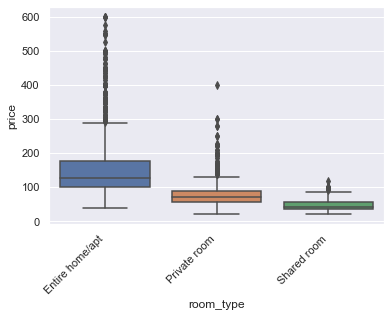

In [89]:
#room type vs. price
sort_price = df.loc[(df.price <= 600) & (df.price > 0)]\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=df.loc[(df.price <= 600) & (df.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

Here we can see that entire room/apt has a a much higher median price than the other room types.

## Question -6
What are the most influencial features of the dataset to estimate the price of a listing.

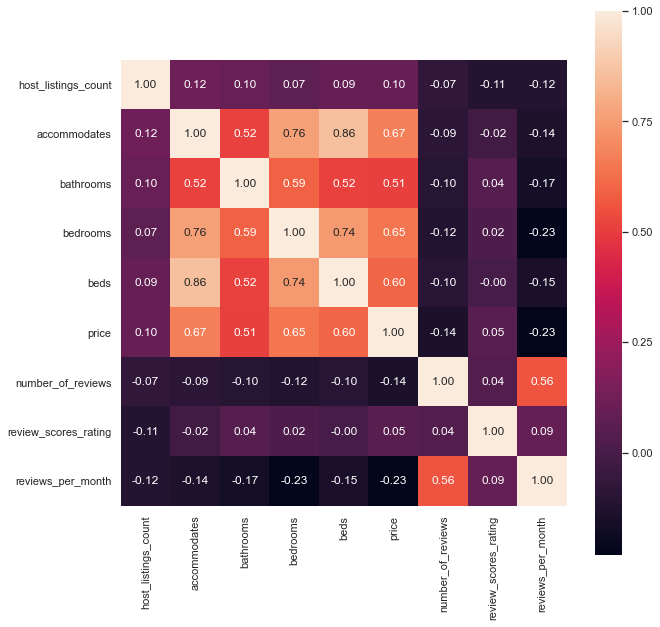

In [90]:
#Check on slected numerical columns which are higly corelational to the price column
col = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']

corr = df.loc[(df.price <= 600)][col].dropna().corr()
plt.figure(figsize = (10,10))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

Here we can see that bedrooms and bed has high positive corelation with the price and Reviews_per_month and number_of_reviews has negative co relation with the price.